<a href="https://colab.research.google.com/github/samuel-joh/workshop2025/blob/main/02_single_node_dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/computational-neurology/workshop2025/blob/main/02_single_node_dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Presentations / questions from previous lecture
*30 mins*

In [1]:
# @title Run this to install dependencies
%%capture
import sys
! pip install ipywidgets

## Building a model of the brain's activity

*10 mins*


In [2]:
from IPython.display import Image, display


emp_scale = "https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fnn.4502/MediaObjects/41593_2017_Article_BFnn4502_Fig1_HTML.jpg?as=webp"
display(Image(url=emp_scale, width=800))
print("From: Bassett, D., Sporns, O. Network neuroscience. Nat Neurosci 20, 353–364 (2017). https://doi.org/10.1038/nn.4502")

sim_scale = "https://media.springernature.com/full/springer-static/image/art%3A10.1007%2Fs10548-021-00828-2/MediaObjects/10548_2021_828_Fig2_HTML.png?as=webp"
display(Image(url=sim_scale, width=800))
print("From: Glomb K, Cabral J, Cattani A, Mazzoni A, Raj A, Franceschiello B. Computational Models in Electroencephalography. Brain Topogr. 2022 Jan;35(1):142-161. doi: 10.1007/s10548-021-00828-2. Epub 2021 Mar 29. PMID: 33779888; PMCID: PMC8813814.")

wbm = "https://media.springernature.com/full/springer-static/image/chp%3A10.1007%2F978-3-030-89439-9_13/MediaObjects/483471_1_En_13_Fig1_HTML.png?as=webp"
display(Image(url=wbm, width=800))

print("From: Griffiths, J.D., Bastiaens, S.P., Kaboodvand, N. (2022). Whole-Brain Modelling: Past, Present, and Future. In: Giugliano, M., Negrello, M., Linaro, D. (eds) Computational Modelling of the Brain. Advances in Experimental Medicine and Biology(), vol 1359. Springer, Cham. https://doi.org/10.1007/978-3-030-89439-9_13")

From: Bassett, D., Sporns, O. Network neuroscience. Nat Neurosci 20, 353–364 (2017). https://doi.org/10.1038/nn.4502


From: Glomb K, Cabral J, Cattani A, Mazzoni A, Raj A, Franceschiello B. Computational Models in Electroencephalography. Brain Topogr. 2022 Jan;35(1):142-161. doi: 10.1007/s10548-021-00828-2. Epub 2021 Mar 29. PMID: 33779888; PMCID: PMC8813814.


From: Griffiths, J.D., Bastiaens, S.P., Kaboodvand, N. (2022). Whole-Brain Modelling: Past, Present, and Future. In: Giugliano, M., Negrello, M., Linaro, D. (eds) Computational Modelling of the Brain. Advances in Experimental Medicine and Biology(), vol 1359. Springer, Cham. https://doi.org/10.1007/978-3-030-89439-9_13


In [3]:
# @title Imports, don't forget to run this cell
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp  # numerical integration solver

In [4]:
# @title Figure settings, don't forget to run this cell
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

In [5]:
# @title Plotting Functions, don't forget to run this cell
def plot_trajectory(system, params, initial_condition, dt=0.1, T=6,
                    figtitle=None):

  """
  Shows the solution of a linear system with two variables in 3 plots.
  The first plot shows x1 over time. The second plot shows x2 over time.
  The third plot shows x1 and x2 in a phase portrait.

  Args:
    system (function): a function f(x) that computes a derivative from
                        inputs (t, [x1, x2], *params)
    params (list or tuple): list of parameters for function "system"
    initial_condition (list or array): initial condition x0
    dt (float): time step of simulation
    T (float): end time of simulation
    figtitlte (string): title for the figure

  Returns:
    nothing, but it shows a figure
  """

  # time points for which we want to evaluate solutions
  t = np.arange(0, T, dt)

  # Integrate
  # use built-in ode solver
  solution = solve_ivp(system,
                    t_span=(0, T),
                    y0=initial_condition, t_eval=t,
                    args=(params),
                    dense_output=True)
  x = solution.y

  # make a color map to visualize time
  timecolors = np.array([(1 , 0 , 0, i)  for i in t / t[-1]])

  # make a large figure
  fig, (ah1, ah2, ah3) = plt.subplots(1, 3)
  fig.set_size_inches(10, 3)

  # plot x1 as a function of time
  ah1.scatter(t, x[0,], color=timecolors)
  ah1.set_xlabel('time')
  ah1.set_ylabel('x1', labelpad=-5)

  # plot x2 as a function of time
  ah2.scatter(t, x[1], color=timecolors)
  ah2.set_xlabel('time')
  ah2.set_ylabel('x2', labelpad=-5)

  # plot x1 and x2 in a phase portrait
  ah3.scatter(x[0,], x[1,], color=timecolors)
  ah3.set_xlabel('x1')
  ah3.set_ylabel('x2', labelpad=-5)
  #include initial condition is a blue cross
  ah3.plot(x[0,0], x[1,0], 'bx')

  # adjust spacing between subplots
  plt.subplots_adjust(wspace=0.5)

  # add figure title
  if figtitle is not None:
    fig.suptitle(figtitle, size=16)
  plt.show()


def plot_streamplot(A, ax, figtitle=None, show=True):
  """
  Show a stream plot for a linear ordinary differential equation with
  state vector x=[x1,x2] in axis ax.

  Args:
    A (numpy array): 2x2 matrix specifying the dynamical system
    ax (matplotlib.axes): axis to plot
    figtitle (string): title for the figure
    show (boolean): enable plt.show()

  Returns:
    nothing, but shows a figure
  """

  # sample 20 x 20 grid uniformly to get x1 and x2
  grid = np.arange(-20, 21, 1)
  x1, x2 = np.meshgrid(grid, grid)

  # calculate x1dot and x2dot at each grid point
  x1dot = A[0,0] * x1 + A[0,1] * x2
  x2dot = A[1,0] * x1 + A[1,1] * x2

  # make a colormap
  magnitude = np.sqrt(x1dot ** 2 + x2dot ** 2)
  color = 2 * np.log1p(magnitude) #Avoid taking log of zero

  # plot
  plt.sca(ax)
  plt.streamplot(x1, x2, x1dot, x2dot, color=color,
                 linewidth=1, cmap=plt.cm.cividis,
                 density=2, arrowstyle='->', arrowsize=1.5)
  plt.xlabel(r'$x1$')
  plt.ylabel(r'$x2$')

  # figure title
  if figtitle is not None:
    plt.title(figtitle, size=16)

  # include eigenvectors
  if True:
    # get eigenvalues and eigenvectors of A
    lam, v = np.linalg.eig(A)

    # get eigenvectors of A
    eigenvector1 = v[:,0].real
    eigenvector2 = v[:,1].real

    # plot eigenvectors
    plt.arrow(0, 0, 20*eigenvector1[0], 20*eigenvector1[1],
              width=0.5, color='r', head_width=2,
              length_includes_head=True)
    plt.arrow(0, 0, 20*eigenvector2[0], 20*eigenvector2[1],
              width=0.5, color='b', head_width=2,
              length_includes_head=True)
  if show:
    plt.show()


def plot_specific_example_stream_plots(A_options):
  """
  Show a stream plot for each A in A_options

  Args:
    A (list): a list of numpy arrays (each element is A)

  Returns:
    nothing, but shows a figure
  """
  # get stream plots for the four different systems
  plt.figure(figsize=(10, 10))

  for i, A in enumerate(A_options):

    ax = plt.subplot(2, 2, 1+i)
    # get eigenvalues and eigenvectors
    lam, v = np.linalg.eig(A)

    # plot eigenvalues as title
    # (two spaces looks better than one)
    eigstr = ",  ".join([f"{x:.2f}" for x in lam])
    figtitle =f"A with eigenvalues\n"+ '[' + eigstr + ']'
    plot_streamplot(A, ax, figtitle=figtitle, show=False)

    # Remove y_labels on righthand plots
    if i % 2:
      ax.set_ylabel(None)
    if i < 2:
      ax.set_xlabel(None)

    plt.subplots_adjust(wspace=0.3, hspace=0.3)
  plt.show()

<div class="alert alert-block alert-success">
<b>Exercise 1a </b><p>
The following cell is a recap of relevant equations. Try to complete the following function integrate_exponential() to perform the forward Euler Integration scheme. Substitute the [...] with your code.

*Hint: You should translate to code the equations below*

Try to solve it on your own for around 10 minutes. Then, if you are stuck, you can copy the code for the function integrate_exponential() from the next hidden cell.

Here we will implement our own forward Euler integration scheme allowing us to solve a differential equation numerically. Recap: differential equations express the **rate of change** of the state variable $x$. One typically describes this rate of change using the derivative of $x$ with respect to time ($dx/dt$, which is the same as saying $\dot{x}$) on the left hand side of the differential equation.

In a simple linear dynamical system:

$$\dot{x} = a x$$

where $a$ is a scalar.

Solutions the previous equations are:

\begin{equation}
x(t) = x_0 e^{(a t)}
\end{equation}

where $x_0$ is the **initial condition** of the equation -- that is, the value of $x$ at time $0$.
</details>

We can simulate an ordinary differential equation by modeling time as a discrete list of time steps $t_0, t_1, t_2, \dots$, such that $t_{i+1}=t_i+dt$. We can get the small change $dx$ over a small duration $dt$ of time from the definition of the differential:

$$
\begin{align}
\dot x &= \frac{dx}{dt} \\
dx &= \dot x\, dt
\end{align}
$$

So, at each time step $t_i$, we compute a value of $x$, $x(t_i)$, as the sum of the value of $x$ at the previous time step, $x(t_{i-1})$ and a small change $dx=\dot x\,dt$:

\begin{equation}
x(t_i)=x(t_{i-1})+\dot x(t_{i-1}) dt
\end{equation}


In [7]:
def integrate_exponential(a, x0, dt, T):
  """Compute solution of the differential equation xdot=a*x with
  initial condition x0 for a duration T. Use time step dt for numerical
  solution.

  Args:
    a (scalar): parameter of xdot (xdot=a*x)
    x0 (scalar): initial condition (x at time 0)
    dt (scalar): timestep of the simulation
    T (scalar): total duration of the simulation

  Returns:
    ndarray, ndarray: `x` for all simulation steps and the time `t` at each step
  """

  # Initialize variables
  t = np.arange(0, T, dt)
  x = np.zeros_like(t, dtype=complex)
  x[0] = x0

  # Step through system and integrate in time

  for k in range(1, len(t)):
    xdot = x[k-1] * a
    x[k] = xdot * dt + x[k-1]

  return x, t

In [ ]:
# @title Copy the function if you get stuck

# Have you tried for 10 minutes on your own?
# Have you tried for 10 minutes on your own?
# Have you tried for 10 minutes on your own?
# Have you tried for 10 minutes on your own?
# Have you tried for 10 minutes on your own?
# Have you tried for 10 minutes on your own?
# Have you tried for 10 minutes on your own?
# Have you tried for 10 minutes on your own?
# Have you tried for 10 minutes on your own?
# Are you sure?
# Are you sure?
# Are you sure?
# Are you sure?
# Are you sure?
# Are you sure?
# Are you sure?
# Are you sure?
# Ok you can copy the function!

def integrate_exponential(a, x0, dt, T):
  """Compute solution of the differential equation xdot=a*x with
  initial condition x0 for a duration T. Use time step dt for numerical
  solution.

  Args:
    a (scalar): parameter of xdot (xdot=a*x)
    x0 (scalar): initial condition (x at time 0)
    dt (scalar): timestep of the simulation
    T (scalar): total duration of the simulation

  Returns:
    ndarray, ndarray: `x` for all simulation steps and the time `t` at each step
  """

  # Initialize variables
  t = np.arange(0, T, dt)
  x = np.zeros_like(t, dtype=complex)
  x[0] = x0 # This is x at time t_0

  # Step through system and integrate in time

  for k in range(1, len(t)):
    xdot = x[k-1] * a
    x[k] = xdot * dt + x[k-1]
  return x, t

<div class="alert alert-block alert-success">
<b>Exercise 1b </b><p>

Try to plot the results and see how x changes over time. Try various initial conditions and a. How does the activity evolve in relation to different a or x0? Discuss in your group what you have found (5 mins)

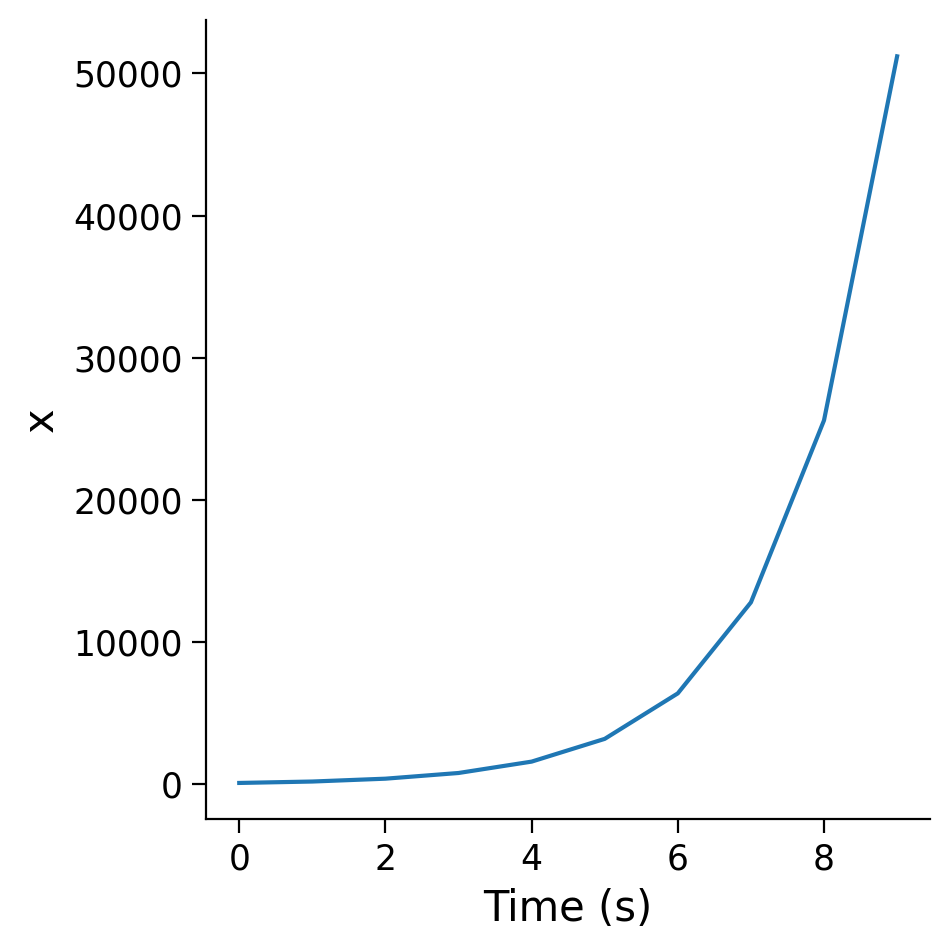

In [27]:
# Choose parameters
a = 1    # parameter in f(x)
T = 10      # total Time duration
dt = 1  # timestep of our simulation
x0 = 100.     # initial condition of x at time 0

# Use Euler's method
x, t = integrate_exponential(a, x0, dt, T)

# Visualize
plt.figure(figsize = (5,5))
plt.plot(t, x.real)
plt.xlabel('Time (s)')
plt.ylabel('x')
plt.show()

<div class="alert alert-block alert-success">
<b>Exercise 1c </b><p>

1.  The $dt$ is the step size of the forward Euler integration. What happens to the numerical solution when you increase $dt$? What happens if you lower it? First try to think about it and write down your answer.
2. Go to the following cell and run it to activate the widget allowing you to test your hypothesis. Does the change in $dt$ from the widget reflect your hypothesis? Should you change your hypothesis in light of new evidence from the widget? Discuss with your group.

*5 minutes*

Write down your answer:
....

In [21]:
# @title Make sure you execute this cell to enable the widget!
def plot_slope(dt):
  """
    Args:
      dt  : time-step
    Returns:
      A figure of an exponential, the slope of the exponential and the derivative exponential
  """

  t = np.arange(0, 5+0.1/2, 0.1)


  fig = plt.figure(figsize=(6, 4))
  # Exponential
  p = np.exp(0.3*t)
  plt.plot(t, p, label='x')
  # slope
  plt.plot([1, 1+dt], [np.exp(0.3*1), np.exp(0.3*(1+dt))],':og',label=r'$\frac{x(1+\Delta t)-x(1)}{\Delta t}$')
  # derivative
  plt.plot([1, 1+dt], [np.exp(0.3*1), np.exp(0.3*(1))+dt*0.3*np.exp(0.3*(1))],'-k',label=r'$\frac{dx}{dt}$')
  plt.legend()
  plt.plot(1+dt, np.exp(0.3*(1+dt)), 'og')
  plt.ylabel('x')
  plt.xlabel('t')
  plt.show()

# Imports
import numpy as np
import matplotlib.pyplot as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
import IPython.display as ipd
from matplotlib import gridspec
import ipywidgets as widgets  # interactive display
from ipywidgets import Label
%config InlineBackend.figure_format = 'retina'

my_layout = widgets.Layout()

feedback_prefix = "W0D4_T3"

my_layout.width = '450px'
@widgets.interact(

    dt=widgets.FloatSlider(1, min=0., max=4., step=.1,
                                layout=my_layout)

)

def Pop_widget(dt):
  plot_slope(dt)
  plt.show()

interactive(children=(FloatSlider(value=1.0, description='dt', layout=Layout(width='450px'), max=4.0), Output(…

<p>
 -End of exercise-
    </div>


<div class="alert alert-block alert-success">
<b> Bonus Exercise </b><p>

In the following exercise, you can change the real part and imaginary part of $a$ (so a = real + imaginary i)

1. What values of $a$ produce dynamics that both ***oscillate*** and ***grow***?
2. What value of $a$ is needed to produce a stable oscillation of 0.5 Hertz (cycles/time units)?


In [ ]:
# @title Make sure you execute this cell to enable the widget!

# parameters
T = 5  # total Time duration
dt = 0.0001  # timestep of our simulation
x0 = 1.  # initial condition of x at time 0

@widgets.interact
def plot_euler_integration(real=(-2, 2, .2), imaginary=(-4, 7, .1)):

  a = complex(real, imaginary)
  x, t = integrate_exponential(a, x0, dt, T)
  plt.figure(figsize=(5,5))
  plt.plot(t, x.real)  # integrate exponential returns complex
  plt.grid(True)
  plt.xlabel('Time (s)')
  plt.ylabel('x')
  plt.show()

In [ ]:
# @title Solution, click to check if your idea is correct!
# 1) To make the system both oscillate and grow, real has to be positive,
# and imaginary has to be not zero.

# 2) Stable oscillation of 0.5 Hz (half a cycle per unit time, or one cycle per two
# unit time) is achieved with real = 0 and imaginary = +/- pi
# (approximately 3.1 or -3.1).

<p>
 -End of bonus exercise-
</div>

# Pause: 15 mins

# Discussion of previous exercise: 10 minutes

# Part 2: Node-level dynamics

Now that we have a general idea of what a dynamical system is and how numerical solutions work, we will start to build our own model of the brain. Today we simulate the activity of a single brain region using a Python package called [Neurolib](https://github.com/neurolib-dev/neurolib) allowing for easy simulations of brain functional activity.

Neurolib is very fast and easy to use, but there is also other software allowing you to do the same kinds of simulations, like [The Virtual Brain](https://thevirtualbrain.org/tvb/zwei) (TVB). With TVB you also get a graphical user interface if you are yet not too keen on programming, but want to explore whole-brain models while improving your coding skills. The only drawback from TVB is that it is currently pretty slow.

The same concepts you will learn today, though, also apply to TVB or any other whole-brain modeling packages.

# Kuramoto Model
*20 minutes*

In [ ]:
%%capture
# @title run this cell so neurolib will be installed while you read the text
!{sys.executable} -m pip install git+https://github.com/neurolib-dev/neurolib.git

![bio_vs_pheno](https://www.mdpi.com/brainsci/brainsci-13-01133/article_deploy/html/images/brainsci-13-01133-g002-550.jpg)

We will start to simulate a single brain region using a simple phase oscillator model known as the Kuramoto model, telling us how the phase of the oscillator evolves over time. We will consider:

$$ \frac{d \theta_i}{dt} = \omega_i + \zeta_i$$

Here $\theta_i$ is the phase of oscillator $i$, $\omega_i$ is the natural frequency of oscillator $i$, $\zeta_i$ is the noise term.

We will use Neurolib to perform our simulations.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Some useful functions are provided here
import neurolib.utils.functions as func
# Let's import the Kuramoto model
from neurolib.models.kuramoto import KuramotoModel

# Initialize the Kuramoto model for a single node
model = KuramotoModel()
# Set the duration of your simulation
model.params['duration'] = 100
# Set the intrinsic frequency
model.params['omega'] = np.array([.5 * np.pi])
# Set the noise
model.params['sigma_ou'] = 0
# Let's run the model!
model.run()

### Perform exercise 2a-c
If you have time you can also move to the bonus exercise on coupled oscillators. Don't worry if you don't have time, it will also be part of the preparatory material for next week.

<div class="alert alert-block alert-success">
<b> Exercise 2a </b><p>

What are the model outputs? What do they mean? Hint: model.outputs is a dictionary...
<p>

In [ ]:
print(...)

In [ ]:
#@ title Click to show the answer:
# The model outputs a numpy array containing the times of our simulation and the corresponding phases.

<div class="alert alert-block alert-success">
<b> Exercise 2b </b><p>

Print the evolution of the oscillator's phase over time. Your code goes into [...]
<p>

In [ ]:
# Get the theta and cap it to only 2 pi ()
theta = model['theta'].T
theta_capped = np.mod(theta, 2*np.pi) # cap theta to [0, 2*pi]
# Plot the phases over time
plt.figure(figsize=(5,5))
plt.plot([...], [...])
plt.xlabel("Time")
plt.ylabel("Theta")
plt.yticks(np.arange(0, 2*np.pi+0.1, np.pi/2), [ r"$0$", r"$\pi/2$", r"$\pi$", r"$3/4\pi$", r"$2\pi$",])# modify y-axis ticks to be in multiples of pi
plt.show()

<div class="alert alert-block alert-success">
<b> Exercise 2c </b><p>

Run the following cell to display the outputs of the Kuramoto model for a single node.
Write down your answer to the following questions and then check for yourself:
1. What happens if you increase the frequency of the oscillator?
2. What happens if you decrease it?
3. What happens if you increase the noise?

Your answers:
1. ...
2. ...
3. ...

<p>

In [ ]:
# @title Run this cell to enable the widget
from ipywidgets import interact, FloatSlider
# Function to run the model and plot the results
def run_kuramoto_model(frequency=0.5*np.pi, noise=0):
    model = KuramotoModel()
    model.params['duration'] = 100
    model.params['omega'] = np.array([frequency])
    model.params['sigma_ou'] = noise
    model.run()
    plt.plot(model.outputs['t'], model.outputs['theta'].T)
    plt.title('Kuramoto Model Output')
    plt.xlabel('Time')
    plt.ylabel('Theta')
    plt.show()

# Create interactive widgets for frequency and noise
frequency_slider = FloatSlider(min=0, max=np.pi, step=0.1, value=0.5*np.pi, description='Frequency')
noise_slider = FloatSlider(min=0, max=2, step=0.1, value=0, description='Noise')

# Use the interact function to update the model based on slider values
interact(run_kuramoto_model, frequency=frequency_slider, noise=noise_slider)

## Bonus: Coupling oscillators together

The Kuramoto model for coupled oscillators is defined by the following differential equation:
$$ \frac{d \theta_i}{dt} = \omega_i + \zeta_i + \frac{K}{N} \sum_{j=1}^N A_{ij} sin(\theta_j(t - \tau_{ij}) - \theta_i(t)) + h_i(t)$$
here, as before, $\theta_i$ is the phase of oscillator $i$, $\omega_i$ is the natural frequency of oscillator $i$, $\zeta_i$ is the noise term, $K$ is the global coupling strength, $A$ is the coupling matrix, $\tau_{ij}$ is the phase lag between oscillator $i$ and $j$, and $h_i(t)$ is the external input to oscillator $i$.


The Kuramoto model describes synchronization between oscillators. Nodes in the network are influenced not only by their own natural frequency but also by the other nodes in the network. The strength of this influence is determined by the global coupling and the connectivity matrix. The degree of synchronization depends on the strength of the coupling. The Kuramoto model is relatively simple, mathematically tractable, and easy to understand.

Here we are dealing with phase over time, so this is not the same as the fMRI timeseries. Nonetheless, the same visual results would still apply to the amplitude of the signal. For example, if two region have the same, or very similar, phases, their functional connectivity would be ~1. Remember that functional connectivity measures how two regions behave together, meaning that if their amplitutes/phases increase at the same time, the regions have high functional connectivity, while as if one increases and the other one decreases, there is little functional connectivity between the two.


Turn off your volume before running the next video

In [ ]:
# @title Run to show video of coupled oscillators
from IPython.display import IFrame

IFrame(src="https://www.youtube.com/embed/T58lGKREubo?si=sYdgFrInHaz0yPEL", width=560, height=315)

In the video you can see how oscillators behave when they are connected. What do you notice? How does the movement of each pendulum start with respect to others? How does it end?

Now we are going to explore the role of coupling. In this scenario we have several oscillators connected to each other. Each oscillator starts with its own frequency and then we will see how they behave over time. First, let's see what happens when the oscillators are not coupled. What do you see?

In [ ]:
# setting parameters
N = 6
# cmat is the structural connectivity matrix (here we start with a fully
# connected network)
cmat = np.ones((N, N)) # fully connected network
# dmat is the delay matrix, at the moment we consider instantaneous interactions
# between brain regions, so no delays
dmat = np.zeros((N,N)) # no delays

# Let's create a network model!
network_model = KuramotoModel(Cmat=cmat, Dmat=dmat)
# Set the duration of the simulation
network_model.params['duration'] = 50
# Set the intrinsic frequency
network_model.params['omega'] = np.random.rand((N)) * 0.25 * np.pi
# Let's start without any noise
network_model.params['sigma_ou'] = 0.
# For now our oscillators are uncoupled, so K = 0
network_model.params['k'] = 0
network_model.run()

theta = network_model['theta'].T
# cap the phase to be between 0 and 2pi
theta_capped = np.mod(theta, 2*np.pi)

# set up the figure
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

plt.plot(network_model.t, theta_capped)
plt.xlabel("Time")
plt.ylabel("Theta")
plt.yticks(np.arange(0, 2*np.pi+0.1, np.pi/2), [ r"$0$", r"$\pi/2$", r"$\pi$", r"$3/4\pi$", r"$2\pi$",])# modify y-axis ticks to be in multiples of pi
plt.show()

<div class="alert alert-block alert-success">
<b> Exercise </b><p>

Change the coupling and noise to see what happens to the phases. What happens to the signals when you increase coupling? If you leave the coupling constant and increase noise, what happens? Does an increase in noise facilitate coupling or not?

Write down your answer...
<p>


In [ ]:
# @title Run this cell to enable the widget
# Function to run the model and plot the results
def run_kuramoto_network_model(coupling, noise=0):
  # Let's create a network model!
  network_model = KuramotoModel(Cmat=cmat, Dmat=dmat)
  # Set the duration of the simulation
  network_model.params['duration'] = 50
  # Set the intrinsic frequencye
  network_model.params['omega'] = np.ones((N)) * 0.25 * np.pi
  # Let's start without any noise
  network_model.params['sigma_ou'] = noise
  # For now our oscillators are uncoupled, so K = 0
  network_model.params['k'] = coupling
  network_model.run()
  plt.plot(network_model.outputs['t'], network_model.outputs['theta'].T)
  plt.title('Kuramoto Model Output')
  plt.xlabel('Time')
  plt.ylabel('Theta')
  plt.yticks(np.arange(0, 2*np.pi+0.1, np.pi/2), [ r"$0$", r"$\pi/2$", r"$\pi$", r"$3/4\pi$", r"$2\pi$",])# modify y-axis ticks to be in multiples of pi
  plt.show()

# Create interactive widgets for frequency and noise
coupling_slider = FloatSlider(min=0, max=1, step=0.01, value=0, description='Coupling')
noise_slider = FloatSlider(min=0, max=2, step=0.1, value=0, description='Noise')

# Use the interact function to update the model based on slider values
interact(run_kuramoto_network_model, coupling=coupling_slider, noise=noise_slider)

# Recap


A possible way to simulate the activity of the brain over time is to use **whole-brain models**.

Whole-brain models encompass a collection of equations that depict the dynamics and interplay among neural populations across various brain regions. In simpler terms, you divide the brain in different regions (remember the parcellations of different colors from the previous lecture) and simulate the activity of each region over time using a differential equation (for those that don't have a maths background, don't be scared, we won't dive into the details). These equations can be either formulated based on an understanding of the biophysical mechanisms that underlie diverse brain activities (biophysical models, e.g., based on specific assumptions like neuronal membrane conductance), or they can be chosen based on the dynamics they generate (phenomenological models, they describe what we see pretty well, even though they don't arise from biological variables). We will dive further into the differences later on.
The local dynamics between different regions are then combined with estimates of anatomical connectivity networks obtained from in vivo measurements (via the structural connectivity matrix we discussed in the previous lecture).

Most whole-brain models thus consist of three fundamental components:

- *Local dynamics:* The activity of each brain region is typically determined by the selected local dynamics along with interaction terms involving other regions (e.g non-linear oscillators, neural field theory, neural mass models, etc.). As previously stated, the spatial scale is a limiting factor. If you were to simulate each neuron, you would have approximately 86 billions equations + 100 trillions of connection (this is if you summarize each neuron with just one free variable)... This is not achievable in real life, so if we want to simulate the whole brain we need to compromise on spatial scale. What we can do is simplify the activity of hundreds of millions of neurons (those composing each of our ROIs, see next) with just one (or a few) simple equation. So each of our regions will be in the order of 5-10 cm^2.

- *Brain parcellation:* A brain parcellation determines the number of regions and the spatial resolution at which the brain dynamics occur. This parcellation may include cortical, sub-cortical, and cerebellar regions.

- *Anatomical connectivity matrix:* This matrix defines the network of connections between brain regions. Many studies rely on the human connectome, which is derived by estimating the number of white-matter fibers connecting different brain areas using DTI data combined with probabilistic tractography.


In this tutorial we covered some of the key components involved in computational modelling of single region dynamics. In the next lecture we will try to recreate a whole brain!

# Last remarks and instructions on group work
*10 minutes*

# Acknowledgments
Parts of this tutorial were taken from [Neuromatch Academy](https://compneuro.neuromatch.io/tutorials/intro.html). Their course on Computational Neuroscience delves into many more details on dynamical systems and biophysically detailed neural mass models. If you are interested in these topics, it is free to follow at your own pace.

[TVB](https://wiki.ebrains.eu/bin/view/Collabs/documentation/tutorials/The%20Virtual%20Brain/) also offers some more tutorials. Further tutorials  (credits to Davide Momi, Joana Cabral and John Griffiths) can be found [here](https://griffithslab.github.io/OHBM-whole-brain-modelling-course/).

